# Importing Modules

In [1]:
from scipy import optimize
import cvxopt

import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()

# Classification of Optimization Problems(优化问题分类)

# Univariate Optimization

In [2]:
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r**2 * h
h_r = sympy.solve(Volume - 1)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]
rsol

In [3]:
_.evalf()

现在验证二阶导数是正的，rsol对应一个最小值

In [4]:
Area_r.diff(r, 2).subs(r, rsol)

In [5]:
Area_r.subs(r, rsol)

In [6]:
 _.evalf()

### 18-21

In [8]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r
r_min = optimize.brent(f, brack=(0.1, 4))
r_min

In [9]:
f(r_min)

### 22

In [10]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

# Unconstrained Multivariate Optimization

In [11]:
x1, x2 = sympy.symbols("x_1, x_2")
f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]
# Gradient
sympy.Matrix(fprime_sym)

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [13]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in
(x1, x2)]
# Hessian
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

### 29-31

In [14]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

### 32-35

In [15]:
def func_XY_to_X_Y(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda X: np.array(f(X[0], X[1]))
f = func_XY_to_X_Y(f_lmbda)
fprime = func_XY_to_X_Y(fprime_lmbda)
fhess = func_XY_to_X_Y(fhess_lmbda)

### 36-37

In [16]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


In [17]:
x_opt

array([1.88292613, 1.37658523])

### 38

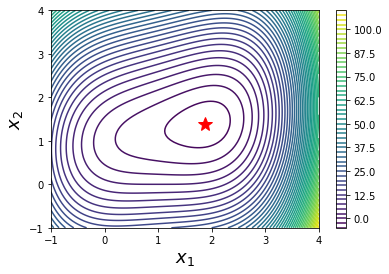

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

### 39-42

In [19]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [20]:
x_opt

array([1.88292645, 1.37658596])

In [21]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [23]:
x_opt

array([1.88292612, 1.37658523])

### 43-44

In [24]:
x_opt = optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


In [25]:
x_opt

array([1.88292644, 1.37658595])

### 45

In [26]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2

### 46-48

In [27]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5),slice(-3, 5, 0.5)), finish=None)
x_start

array([1.5, 1.5])

In [28]:
f(x_start)

### 49-51

In [29]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


In [30]:
x_opt

array([1.47586906, 1.48365787])

In [31]:
f(x_opt)

### 52-53

In [33]:
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

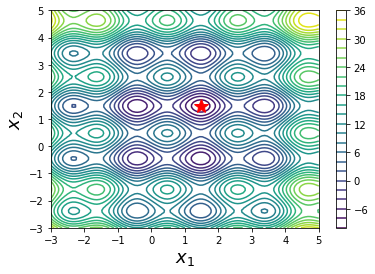

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

### 54-56

In [40]:
x_opt = optimize.fmin_bfgs(f, x_start)
result = optimize.minimize(f, x_start, method= 'BFGS')
x_opt = result.x

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


# Nonlinear Least Square Problems

### 57-58

In [41]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

### 59-61

In [42]:
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

### 62

In [43]:
def g(beta):
    return ydata - f(xdata, *beta)

### 63-65

In [44]:
beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([0.24150022, 0.73414801, 0.46568924])

### 66

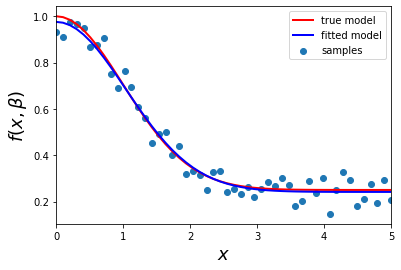

In [45]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()

### 67-68

In [47]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.24150022, 0.73414801, 0.46568924])

# Constrained Optimization

### 69-73

In [48]:
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2

In [49]:
x_opt = optimize.minimize(f, [1, 1], method='BFGS').x

In [50]:
bnd_x1, bnd_x2 = (2, 3), (0, 2)

In [51]:
x_cons_opt = optimize.minimize(f, [1, 1], method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x

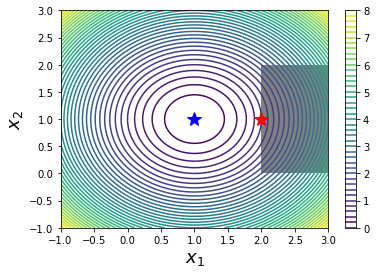

In [52]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
                           bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0], facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

### 74-80

In [53]:
x = x0, x1, x2, l = sympy.symbols("x_0, x_1, x_2, lambda")
f = x0 * x1 * x2
g = 2 * (x0 * x1 + x1 * x2 + x2 * x0) - 1
L = f + l * g

In [54]:
grad_L = [sympy.diff(L, x_) for x_ in x]
sols = sympy.solve(grad_L)
sols

### 81-82

In [55]:
g.subs(sols[0])

In [56]:
f.subs(sols[0])

### 83-84

In [58]:
#定义目标函数与约束函数
def f(X):
    return -X[0] * X[1] * X[2]   #最小化与最大化问题转变

In [59]:
def g(X):
    return 2 * (X[0]*X[1] + X[1] * X[2] + X[2] * X[0]) - 1

### 85-88

In [63]:
#为g(x)定义约束字典,并调用最小化优化函数
constraint = dict(type='eq', fun=g)
result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP',constraints=[constraint])
'''
scipy.optimize.minimize(fun, x0,method=None,constraints=())
fun：要最小化的目标函数。
x0：ndarray，shape=（n，） 大小为（n，）的实元素数组，其中“n”是自变量的数目。
method：可选解算器的类型
constraints：字符串约束类型：“eq”表示相等，“ineq”表示不等式
'''
result

     fun: -0.06804136862287297
     jac: array([-0.16666925, -0.16666542, -0.16666526])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.40824188, 0.40825127, 0.40825165])

In [64]:
result.x

array([0.40824188, 0.40825127, 0.40825165])

### 89-93

In [2]:
#从定义目标函数和约束函数以及约束字典
def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2
def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4
constraints = [dict(type='ineq', fun=g)]

In [3]:
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP',constraints=constraints).x


In [8]:
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP',constraints=constraints).x
print(x_cons_opt)
x_cobyla_opt = optimize.minimize(f, (0, 0), method='COBYLA', constraints=constraints).x
print(x_cobyla_opt)

[0.96857656 1.75228252]
[0.96865024 1.75228559]


### 94-95

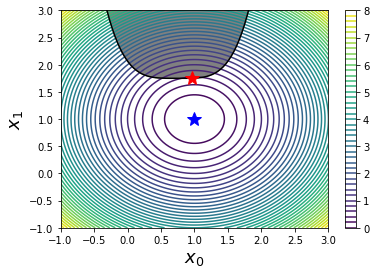

In [70]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax) 

# Linear Programming

### 96-101

In [72]:
#为A矩阵、c和b向量创建NumPy数组，并转换为cvxopt矩阵:
c = np.array([-1.0, 2.0, -3.0])
A = np.array([[ 1.0, 1.0, 0.0],
              [-1.0, 3.0, 0.0],
              [ 0.0, -1.0, 1.0]])
b = np.array([1.0, 2.0, 3.0])
A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)

In [73]:
#将cvxopt兼容矩阵和向量c_、A_、b_传递给线性规划求解器:
sol = cvxopt.solvers.lp(c_, A_, b_)

Optimal solution found.


In [75]:
x = np.array(sol['x'])
x

array([[0.25],
       [0.75],
       [3.75]])

In [77]:
sol['primal objective']